## Assignment 2

### Import data from OpenPhillyData

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline
AffordableHousing = pd.read_csv("data/Affordable_Housing.csv") #import data
AffordableHousing.head(n=10)

,OBJECTID,YEARCOMPLETE,PROJECTNAME,DEVELOPERNAME,ADDRESS,PROJECTTYPE,TOTALUNITS
0,1,1995,MANSION COURT I,PENNROSE,1800 NORTH 32ND STREET,Rental,31.0
1,2,1995,GRATZ COMMONS,ACDC,2122 N GRATZ ST,Rental,39.0
2,3,1995,JARDINES DEL BORINQUEN I,APM,2024 N 6TH ST,Rental,45.0
3,4,1995,SARAH ALLEN II,FRIENDS REHABILITATION PROGRAM,4035 PARRISH ST,Rental,36.0
4,5,1995,MODEL CITIES #6,MICHAELS DEVELOPMENT,2200 N 13TH ST,Rental,70.0
5,6,1995,FAIRMOUNT,INGERMAN,717 N 16TH ST,Rental,33.0
6,7,1996,GENESIS II,GENESIS/TARA,1239 SPRING GARDEN ST,Special Needs,20.0
7,8,1996,KEARSLEY,KEARSLEY/CHRIST CH HOSP,2100 N 49TH ST,Rental,60.0
8,9,1996,ST. ELIZABETH'S,PROJECT HOME,1850 N CROSKEY ST,Special Needs,24.0
9,10,1996,LOWER GERMANTOWN II,GGHDC,50 COLLOM ST,Rental,34.0


### Matplotlib Chart

Plotting Homeownership...
Plotting Rental...
Plotting Rental;Special Needs...
Plotting Special Needs...


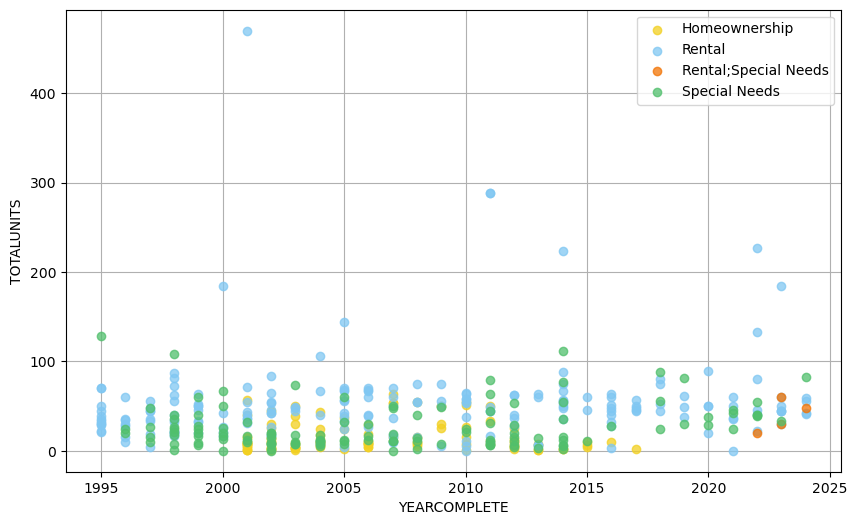

In [9]:
# Setup a dict to hold colors for each species
color_map = {"Rental": "#80C7F2", "Special Needs": "#50BF6C", "Homeownership": "#F2D022","Rental;Special Needs":"#F27405"}

# Initialize the figure "fig" and axes "ax"
fig, ax = plt.subplots(figsize=(10, 6))

# Group the data frame by species and loop over each group
for PROJECTTYPE, group_df in AffordableHousing.groupby("PROJECTTYPE"):
    print(f"Plotting {PROJECTTYPE}...")

    # Plot flipper length vs bill length for this group
    # Note: we are adding this plot to the existing "ax" object
    ax.scatter(
        group_df["YEARCOMPLETE"],
        group_df["TOTALUNITS"],
        marker="o",
        label=PROJECTTYPE,
        color=color_map[PROJECTTYPE],
        alpha=0.75,
        zorder=10
    )

## Add a legend to the axes
ax.legend(loc="best")

## Add x-axis and y-axis labels
ax.set_xlabel("YEARCOMPLETE")
ax.set_ylabel("TOTALUNITS")

## Add the grid of lines
ax.grid(True)

### Discussion
##### This is a scatter plot regarding affordable housing projects over time. Most housing projects completed from 1995 to 2024. The "Rental" and "Special Needs" projects seem to dominate in terms of both frequency and total units compared to other types.

### Seaborn Chart

In [12]:
import seaborn as sns

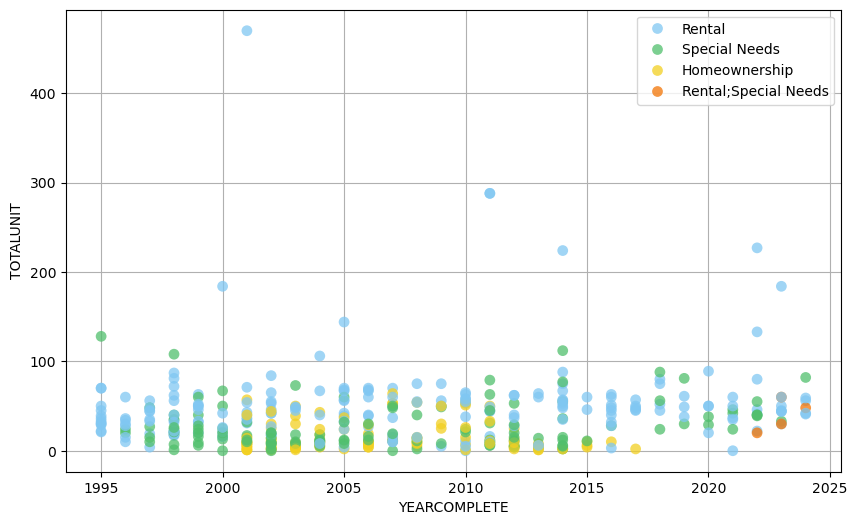

In [13]:
# Initialize the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# style keywords as dict
color_map = {"Rental": "#80C7F2", "Special Needs": "#50BF6C", "Homeownership": "#F2D022","Rental;Special Needs":"#F27405"}
style = dict(palette=color_map, s=60, edgecolor="none", alpha=0.75, zorder=10)

# use the scatterplot() function
sns.scatterplot(
    x="YEARCOMPLETE", # the x column
    y="TOTALUNITS", # the y column
    hue="PROJECTTYPE", # the third dimension (color)
    data=AffordableHousing, # pass in the data
    ax=ax, # plot on the axes object we made
    **style # add our style keywords
)
# Format with matplotlib commands
ax.set_xlabel("YEARCOMPLETE" )
ax.set_ylabel("TOTALUNIT")
ax.grid(True)
ax.legend(loc='best')

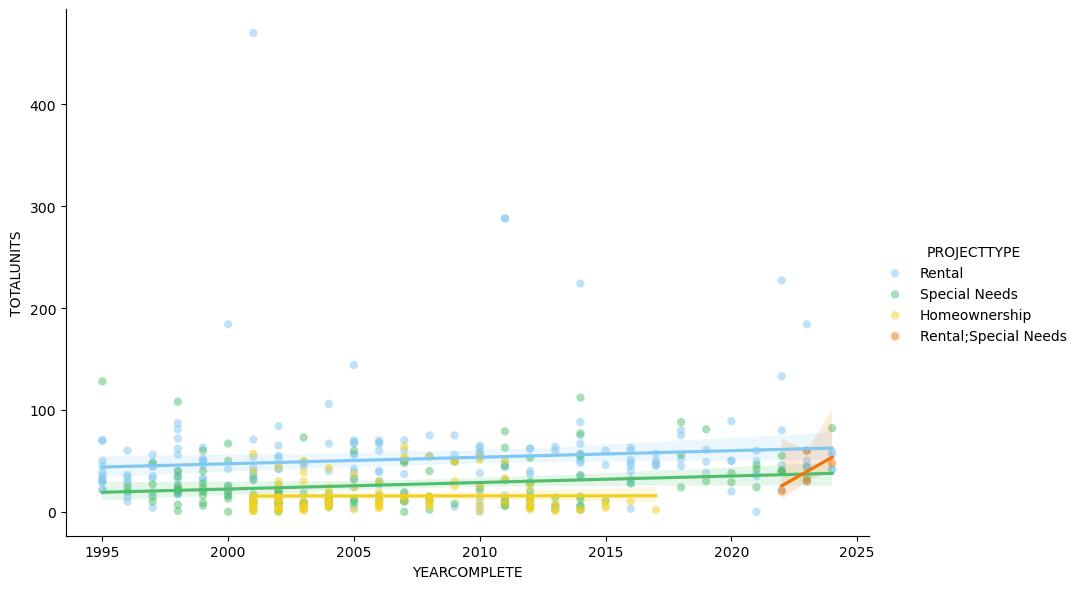

In [14]:
sns.lmplot(
    x="YEARCOMPLETE",
    y="TOTALUNITS",
    hue="PROJECTTYPE",
    data=AffordableHousing,
    height=6,
    aspect=1.5,
    palette=color_map,
    scatter_kws=dict(edgecolor="none", alpha=0.5),
);

### Discussion
#### This is a scatter plot with a regression line to visualize trends in data over time.The x-axis represents the year of project completion, while the y-axis represents the number of units in a project. And it shown that there are increasingly number of affordable housing projects for special needs and rental after 2020. 

### Altair Charts

In [17]:
import altair as alt

### Chart One
 #### Using Altair to generate a faceted scatter plot showing different types of affordable housing projects ("Homeownership," "Rental," "Rental;Special Needs," and "Special Needs") based on the year they were completed and the total number of units they produced.

In [19]:
brush = alt.selection_interval()


(
    alt.Chart(AffordableHousing)  # Create the chart
    .mark_point()  # Use point markers
    .encode(  # Encode
        x=alt.X("YEARCOMPLETE", scale=alt.Scale(zero=False)),  # X
        y=alt.Y("TOTALUNITS", scale=alt.Scale(zero=False)),  # Y
        # NEW: Use a conditional color based on brush
        color=alt.condition(brush, "PROJECTTYPE", alt.value("lightgray")),  # Color
        tooltip=["PROJECTTYPE", "YEARCOMPLETE", "TOTALUNITS"],  # Tooltip
    )
    .add_params(brush)  # NEW: Add brush parameter
    .properties(width=200, height=200)  # Set width/height
    .facet(column="PROJECTTYPE") # Facet
)

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/c

alt.FacetChart(...)

### Chart Two
 #### Using a combination of point and bar charts to show the distribution of different project types over time, along with the number of total units and the count of records for each project type.

In [21]:
brush = alt.selection_interval()


points = (
    alt.Chart()
    .mark_point()
    .encode(
        x=alt.X("YEARCOMPLETE:Q", scale=alt.Scale(zero=False)),
        y=alt.Y("TOTALUNITS:Q", scale=alt.Scale(zero=False)),
        color=alt.condition(brush, "PROJECTTYPE:N", alt.value("lightgray")),
    )
    .properties(width=800)
    .add_params(brush)
)


bars = (
    alt.Chart()
    .mark_bar()
    .encode(
        x="count(PROJECTTYPE):Q",
        y="PROJECTTYPE:N",
        color="PROJECTTYPE:N",
    )
    .transform_filter(
        brush 
    )
    .properties(width=800)
)


chart = alt.vconcat(points, bars, data=AffordableHousing)


chart

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/c

alt.VConcatChart(...)

### Chart Three
 #### Using a stacked bar chart to represent the total units for different PROJECTTYPEs over binned YEARCOMPLETE periods. The bins are defined using the maxbins=20 setting, allowing a clearer view of the total housing units by type over time.

In [23]:
(
    alt.Chart(AffordableHousing)
    .mark_bar()
    .encode(
        x=alt.X("YEARCOMPLETE", bin=alt.Bin(maxbins=20)), 
        y="TOTALUNITS:Q",  
        color="PROJECTTYPE",
        tooltip=["PROJECTTYPE", alt.Tooltip("count()", title="Number of Affordable Housing Projects")],
    )
    .properties(height=250)
)

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/c

alt.Chart(...)

### Chart Four
 #### A line chart showing the mean of total units over time for different project types in affordable housing. It uses binned years on the X-axis and averages the total units on the Y-axis.

In [25]:
(
    alt.Chart(AffordableHousing.dropna())
    .mark_line()
    .encode(
        x=alt.X("YEARCOMPLETE:Q", bin=alt.Bin(maxbins=10)), # Bin the data!
        y=alt.Y(
            "mean(TOTALUNITS):Q", scale=alt.Scale(zero=False) # Mean of flipper length
        ),  
        color="PROJECTTYPE:N",
        tooltip=["mean(TOTALUNITS):Q", "YEARCOMPLETE():Q"],
    )
    .properties(height=300, width=500)
)

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/c

alt.Chart(...)

### Chart Five
 #### Using a repeated chart that repeats two variables across rows and columns.

In [26]:
brush = alt.selection_interval()

(
    alt.Chart(AffordableHousing)
    .mark_circle()
    .encode(
        x=alt.X(alt.repeat("column"), type="quantitative", scale=alt.Scale(zero=False)),
        y=alt.Y(alt.repeat("row"), type="quantitative", scale=alt.Scale(zero=False)),
        color=alt.condition(
            brush, "PROJECTTYPE:N", alt.value("lightgray")
        ),  # conditional color
    )
    .properties(
        width=200,
        height=200,
    )
    .add_params(brush)
    .repeat(  # repeat variables across rows and columns
        row=["YEARCOMPLETE", "TOTALUNITS"],
        column=["YEARCOMPLETE", "TOTALUNITS"],
    )
)

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/opt/anaconda3/lib/python3.12/site-packages/altair/utils/c

alt.RepeatChart(...)